In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [3]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8976 - loss: 0.3357 - val_accuracy: 0.9837 - val_loss: 0.0562
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9856 - loss: 0.0480 - val_accuracy: 0.9880 - val_loss: 0.0436
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9915 - loss: 0.0278 - val_accuracy: 0.9863 - val_loss: 0.0464
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0205 - val_accuracy: 0.9872 - val_loss: 0.0448
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9951 - loss: 0.0145 - val_accuracy: 0.9882 - val_loss: 0.0395


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}', f'Test loss: {test_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9856 - loss: 0.0436
Test accuracy: 0.9891 Test loss: 0.0335


In [8]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


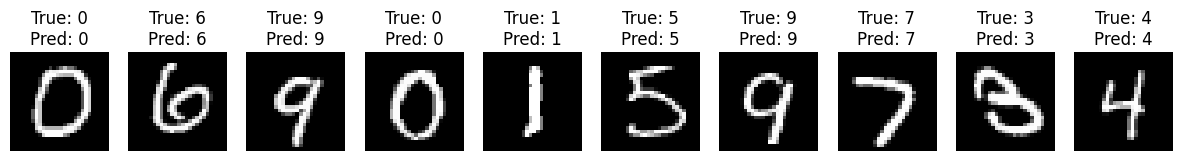

In [13]:
plt.figure(figsize=(15, 3))
start_idx = 0
num = 10
for i in range(num):
    plt.subplot(1, num, i + 1)
    plt.imshow(x_test[start_idx + i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {np.argmax(y_test[start_idx + i])}\nPred: {np.argmax(predictions[start_idx + i])}')
    plt.axis('off')
plt.show()